# Movie Recommender System

In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
df1 = pd.read_csv("/Users/Tanvi/Downloads/Movie/tmdb_5000_credits.csv")
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
df2 = pd.read_csv("/Users/Tanvi/Downloads/Movie/tmdb_5000_movies.csv")

In [4]:
rename = df2.rename(columns={"id":"movie_id"})

In [5]:
df = pd.merge(df1,rename,on='movie_id')

In [6]:
df.drop(['title_x','title_y','homepage'],axis=1,inplace = True)

In [7]:
df.head()

,movie_id,cast,crew,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


In [8]:
import ast


In [9]:
from ast import literal_eval

In [10]:
features = ['crew','keywords', 'cast','genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [11]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names
       

    #Return empty list in case of missing/malformed data
    return []

In [12]:
features = ['crew','keywords','cast','genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [56]:
df[['crew','keywords','cast', 'genres']].head()


,crew,keywords,cast,genres
0,"[Stephen E. Rivkin, Rick Carter, Christopher B...","[culture clash, future, space war]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]"
1,"[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...","[ocean, drug abuse, exotic island]","[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]"
2,"[Thomas Newman, Sam Mendes, Anna Pinnock]","[spy, based on novel, secret agent]","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]"
3,"[Hans Zimmer, Charles Roven, Christopher Nolan]","[dc comics, crime fighter, terrorist]","[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]"
4,"[Andrew Stanton, Andrew Stanton, John Lasseter]","[based on novel, mars, medallion]","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]"


In [14]:
df.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [16]:
import seaborn as sns

In [28]:
unique_language=df.groupby('original_language')[['original_language']].count()

In [31]:
import matplotlib.pyplot as plt

In [69]:
x=df.genres.apply(pd.Series)

In [92]:
gen=x.fillna(0).apply(pd.Series.value_counts,ascending=False)

In [93]:
gen.rename(columns={0:'x',1:'y',2:'z'},inplace=True)

In [94]:
gen

,x,y,z
Action,754,283.0,92
Adventure,339,313.0,103
Animation,123,68.0,37
Comedy,1042,462.0,165
Crime,195,248.0,174
Documentary,89,19.0,2
Drama,1207,788.0,261
Family,56,180.0,172
Fantasy,117,139.0,98
Horror,300,140.0,61


In [103]:
Add=gen.sum(axis=1)

In [105]:
Add.sort_values(ascending=False)

0                  3374.0
Drama              2256.0
Comedy             1669.0
Action             1129.0
Thriller           1005.0
Romance             775.0
Adventure           755.0
Crime               617.0
Horror              501.0
Science Fiction     413.0
Family              408.0
Fantasy             354.0
Mystery             293.0
Animation           228.0
History             172.0
Music               156.0
Documentary         110.0
War                 104.0
Western              57.0
Foreign              28.0
TV Movie              5.0
dtype: float64

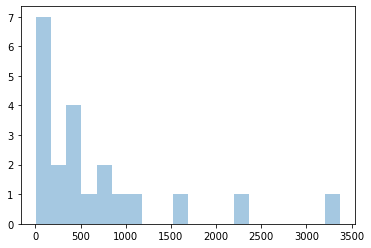

In [113]:
sns.distplot(Add,bins=20,kde=False)

In [120]:
pop=df.sort_values('popularity',ascending=False)

Text(0.5, 1.0, 'Popular Movies')

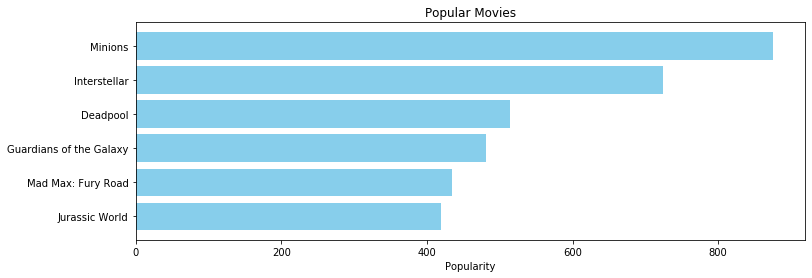

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")